In [1]:
import numpy as np
import pandas as pd
import missingno as msn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,  classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [2]:
# загружаем набор данных
data = pd.read_excel('32_052019.xlsx')
data_copy = data.copy()
data_copy.columns = data_copy.columns.str.strip()
data_copy
#Посмотрел датафрейм

,Код станции отправления,Станция отправления,Регион отгрузки,Ж/Д отгрузки,Отд. ж/д отгрузки,Код станции назначения,Станция назначения,Регион поставки,Ж/Д поставки,Отд. ж/д поставки,...,Станция отправления загран,Код станции отправления загран,Станция назначения загран,Код станции назначения загран,Отч мес,Отч год,Код страны отправления,Страна отправления,Код страны назначения,Страна назначения
0,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,НОВОКУЗ.-СЕВ,86420,БИШКЕК 1,71660,5,19,643,РОССИЯ,417,КИРГИЗИЯ
1,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,НОВОКУЗ.-СЕВ,86420,БИШКЕК 1,71660,5,19,643,РОССИЯ,417,КИРГИЗИЯ
2,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,НОВОКУЗ.-СЕВ,86420,БИШКЕК 1,71660,5,19,643,РОССИЯ,417,КИРГИЗИЯ
3,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,НОВОКУЗ.-СЕВ,86420,АКЖАЙЫК,66160,5,19,643,РОССИЯ,398,КАЗАХСТАН
4,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,НОВОКУЗ.-СЕВ,86420,АКЖАЙЫК,66160,5,19,643,РОССИЯ,398,КАЗАХСТАН
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36188,93460,МЫСОВАЯ,РЕСПУБЛИКА БУРЯТИЯ,Восточно-Сибирская,УЛАH-УДЕH-ОЕ,93320,АНГАСОЛКА,ИРКУТСКАЯ ОБЛАСТЬ,Восточно-Сибирская,УЛАH-УДЕH-ОЕ,...,00000,0,00000,0,5,19,0,РОССИЯ,0,РОССИЯ
36189,93460,МЫСОВАЯ,РЕСПУБЛИКА БУРЯТИЯ,Восточно-Сибирская,УЛАH-УДЕH-ОЕ,93460,МЫСОВАЯ,РЕСПУБЛИКА БУРЯТИЯ,Восточно-Сибирская,УЛАH-УДЕH-ОЕ,...,00000,0,00000,0,5,19,0,РОССИЯ,0,РОССИЯ
36190,94960,ЗИЛОВО,ЧИТИНСКАЯ ОБЛАСТЬ,Забайкальская,МОГОЧИHСКОЕ,95050,СБЕГА,ЧИТИНСКАЯ ОБЛАСТЬ,Забайкальская,МОГОЧИHСКОЕ,...,00000,0,00000,0,5,19,0,РОССИЯ,0,РОССИЯ
36191,65540,ИГЛИНО,РЕСПУБЛИКА БАШКОРТОСТАН,Куйбышевская,БАШКИРСКОЕ,65540,ИГЛИНО,РЕСПУБЛИКА БАШКОРТОСТАН,Куйбышевская,БАШКИРСКОЕ,...,00000,0,00000,0,5,19,0,РОССИЯ,0,РОССИЯ


In [3]:
def x(s):
    if len(str(s)) == 3:


        return str('0'+str(s))
    return str(s)
data_copy['Дата отгрузки'] = data_copy['Дата отгрузки'].apply(x)
data_copy['Дата прибытия'] = data_copy['Дата прибытия'].apply(x)


In [4]:
data_copy.columns

Index(['Код станции отправления', 'Станция отправления', 'Регион отгрузки',
       'Ж/Д отгрузки', 'Отд. ж/д отгрузки', 'Код станции назначения',
       'Станция назначения', 'Регион поставки', 'Ж/Д поставки',
       'Отд. ж/д поставки', 'Код Клиента', 'Клиент', 'Код отправителя груза',
       'ОКПО отправителя', 'Отправитель', 'ФИО Руководителя Отправителя',
       'Почтовый индекс Отправителя', 'Адрес Отправителя', 'Тел. Отправителя',
       'E-mail Отправителя', 'Факс Отправителя', 'Код получателя груза',
       'ОКПО получателя', 'Получатель', 'ФИО Руководителя получателя',
       'Почтовый индекс получателя', 'Адрес получателя', 'Тел. получателя',
       'E-mail Получателя', 'Факс получателя', 'Код груза',
       'Наименование груза', 'Вес груза, тонн', 'Количество вагонов',
       'Тонно-километры', 'Дата отгрузки', 'Дата прибытия',
       'Характер перевозок', 'Станция отправления загран',
       'Код станции отправления загран', 'Станция назначения загран',
       'Код станции 

In [5]:
data_copy.shape

(36193, 48)

In [6]:
data_copy = data_copy.drop_duplicates()
data_copy.shape
# обнаружено 2 дубликата

(36191, 48)

<Axes: >

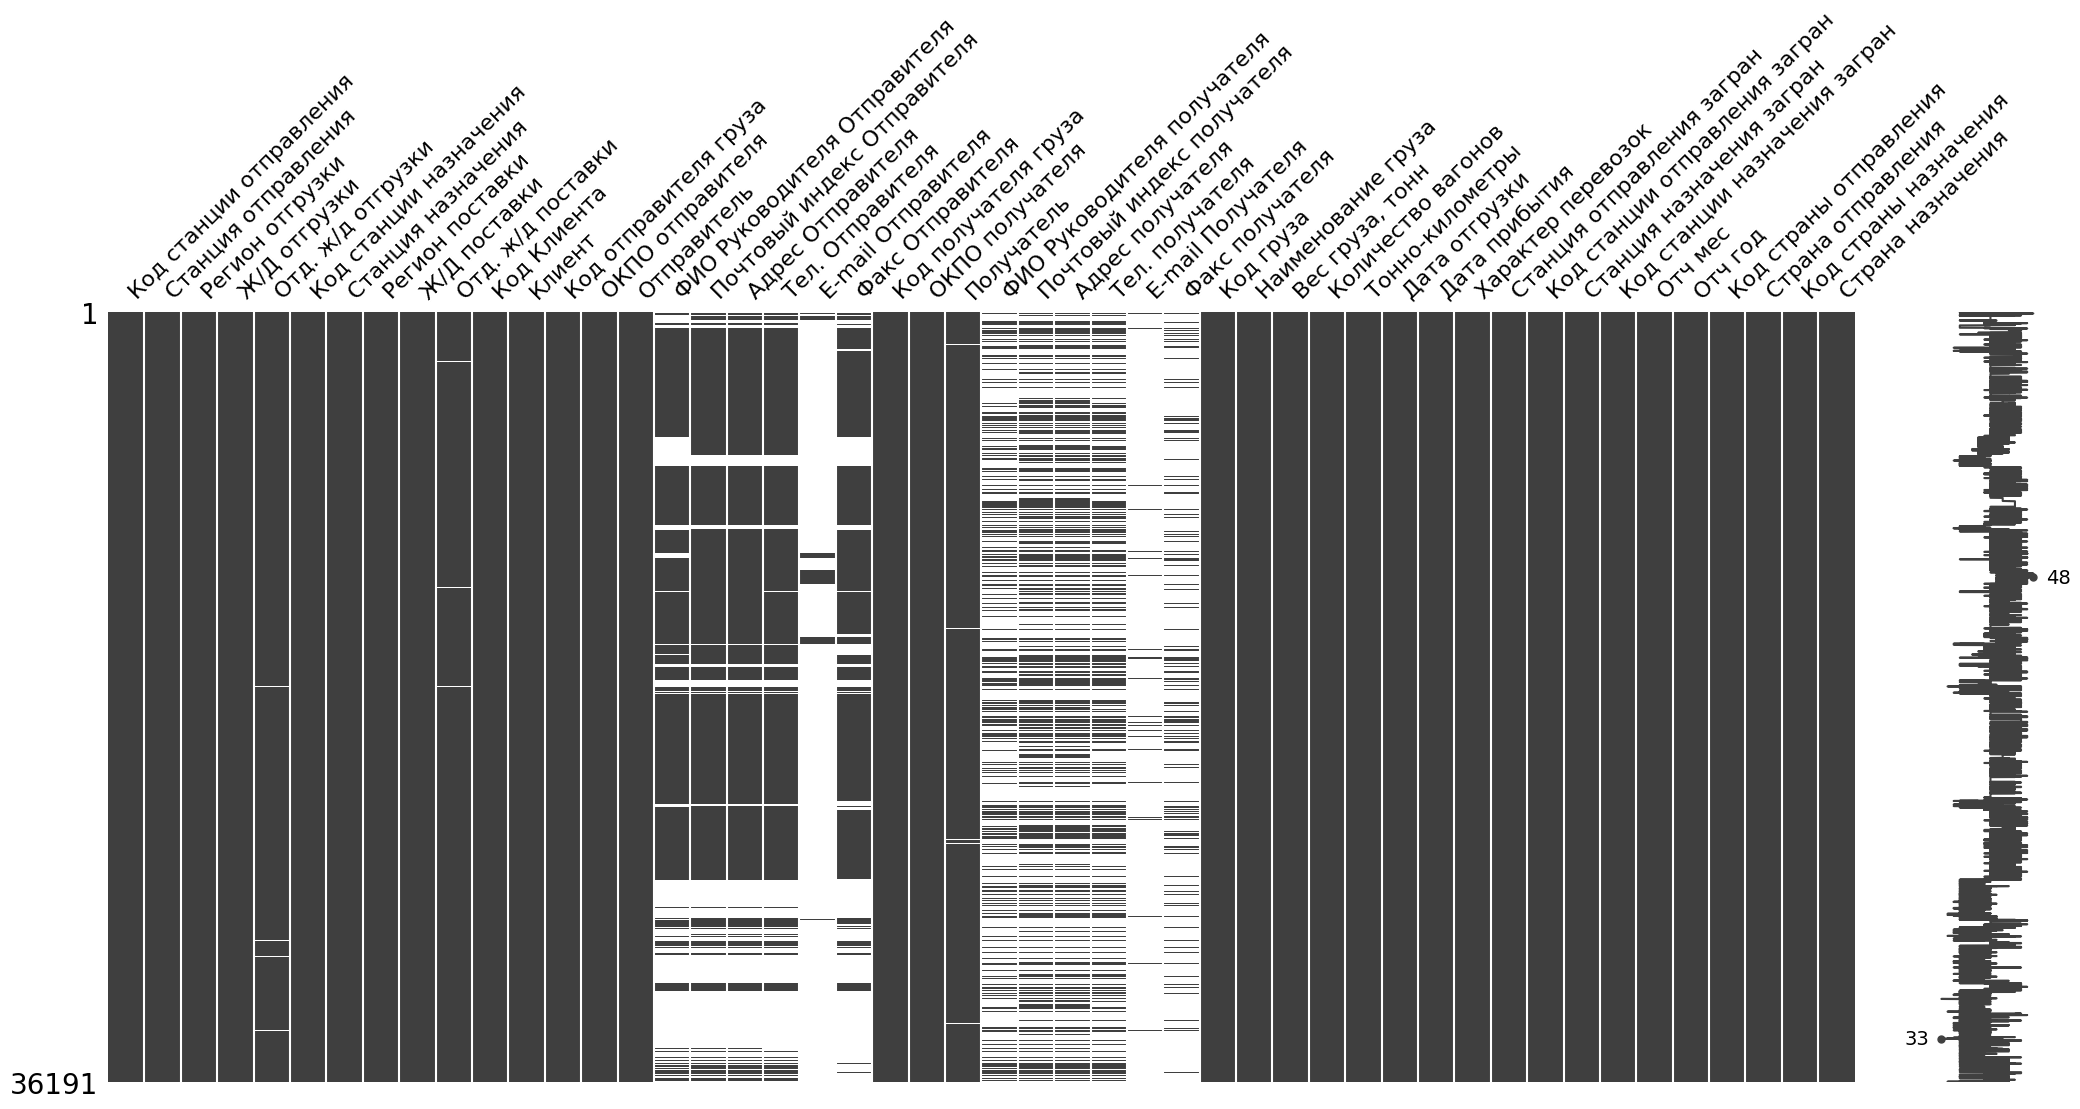

In [7]:
msn.matrix(data_copy)
#построил матрицу Null значений

In [20]:
data_copy.describe()

,Код станции отправления,Код станции назначения,Код Клиента,Код отправителя груза,ОКПО отправителя,Почтовый индекс Отправителя,Код получателя груза,ОКПО получателя,Почтовый индекс получателя,Код груза,"Вес груза, тонн",Количество вагонов,Тонно-километры,Код станции отправления загран,Код станции назначения загран,Отч мес,Отч год,Код страны отправления,Код страны назначения
count,36191.000000,36191.000000,3.619100e+04,36191.000000,3.619100e+04,27169.000000,36191.000000,3.619100e+04,15635.000000,36191.000000,36191.000000,36191.000000,3.619100e+04,36191.000000,36191.000000,36191.0,36191.0,36191.000000,36191.000000
mean,62291.174049,54622.433202,1.438255e+09,5061.660661,1.209006e+07,445583.914461,4989.895748,3.562022e+07,374738.807291,32366.477550,159.386841,3.344975,1.973511e+05,14174.630433,12248.893095,5.0,19.0,132.756680,122.239424
std,24057.359351,29199.269810,1.449086e+09,1968.442065,2.313953e+07,164648.652606,2653.795845,3.230791e+07,204698.744537,87.033388,283.978659,7.686299,5.590091e+05,27968.508061,25713.944129,0.0,0.0,257.785608,251.129083
min,1300.000000,1000.000000,0.000000e+00,30.000000,0.000000e+00,103009.000000,12.000000,0.000000e+00,101407.000000,32101.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,5.0,19.0,0.000000,0.000000
25%,43860.000000,23790.000000,1.000232e+09,3503.000000,1.863870e+05,398040.000000,2864.000000,3.104504e+06,162614.000000,32307.000000,64.030000,1.000000,4.953500e+04,0.000000,0.000000,5.0,19.0,0.000000,0.000000
50%,77000.000000,61660.000000,1.001351e+09,5010.000000,1.866310e+05,455002.000000,5084.000000,2.991780e+07,353901.000000,32411.000000,68.063000,1.000000,1.069320e+05,0.000000,0.000000,5.0,19.0,0.000000,0.000000
75%,81760.000000,80130.000000,1.003305e+09,5865.000000,5.757848e+06,622025.000000,6856.000000,6.071132e+07,620025.000000,32416.000000,135.280000,2.000000,1.932875e+05,0.000000,0.000000,5.0,19.0,0.000000,0.000000
max,99630.000000,99810.000000,7.000118e+09,9999.000000,9.995542e+07,960600.000000,9999.000000,9.999999e+07,960600.000000,32423.000000,7344.600000,118.000000,3.580672e+07,98610.000000,98610.000000,5.0,19.0,840.000000,860.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36193 entries, 0 to 36192
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Код станции отправления         36193 non-null  int64  
 1   Станция отправления             36192 non-null  object 
 2   Регион отгрузки                 36192 non-null  object 
 3   Ж/Д отгрузки                    36192 non-null  object 
 4   Отд. ж/д отгрузки               36085 non-null  object 
 5   Код станции назначения          36193 non-null  int64  
 6   Станция назначения              36192 non-null  object 
 7   Регион поставки                 36192 non-null  object 
 8   Ж/Д поставки                    36192 non-null  object 
 9   Отд. ж/д поставки               35941 non-null  object 
 10  Код Клиента                     36193 non-null  int64  
 11  Клиент                          36193 non-null  object 
 12  Код отправителя груза           

In [9]:
df = data_copy.copy()
df['Дата отгрузки'] = pd.to_datetime(df['Дата отгрузки'], format='%d%m')
df['Дата прибытия'] = pd.to_datetime(df['Дата прибытия'], format='%d%m')

# Вычиcляем разницу и преобразуйте в дни
df['Разница в днях'] = (df['Дата прибытия'] - df['Дата отгрузки']).dt.days

# Выведем результат
print(df.head())

   Код станции отправления   Станция отправления      Регион отгрузки  \
0                    86420  НОВОКУЗНЕЦК-СЕВЕРНЫЙ  КЕМЕРОВСКАЯ ОБЛАСТЬ   
1                    86420  НОВОКУЗНЕЦК-СЕВЕРНЫЙ  КЕМЕРОВСКАЯ ОБЛАСТЬ   
2                    86420  НОВОКУЗНЕЦК-СЕВЕРНЫЙ  КЕМЕРОВСКАЯ ОБЛАСТЬ   
3                    86420  НОВОКУЗНЕЦК-СЕВЕРНЫЙ  КЕМЕРОВСКАЯ ОБЛАСТЬ   
4                    86420  НОВОКУЗНЕЦК-СЕВЕРНЫЙ  КЕМЕРОВСКАЯ ОБЛАСТЬ   

        Ж/Д отгрузки Отд. ж/д отгрузки  Код станции назначения  \
0  Западно-Сибирская      HОВОКУЗHЕЦ-Е                   84480   
1  Западно-Сибирская      HОВОКУЗHЕЦ-Е                   84480   
2  Западно-Сибирская      HОВОКУЗHЕЦ-Е                   84480   
3  Западно-Сибирская      HОВОКУЗHЕЦ-Е                   84480   
4  Западно-Сибирская      HОВОКУЗHЕЦ-Е                   84480   

        Станция назначения Регион поставки       Ж/Д поставки  \
0  КУЛУНДА-ЭКСПОРТ (В КАЗ)  АЛТАЙСКИЙ КРАЙ  Западно-Сибирская   
1  КУЛУНДА-ЭКСПОРТ (В КАЗ)  АЛТАЙС

In [10]:
for column in df.columns:
    nan_count = df[column].isnull().sum()
    total_count = len(df[column])
    percentage = nan_count/total_count*100
    print(f'Процент NaN значений в столбце {column} равен {percentage}%')
# вывод процента пропущеннных значений по столбцам

Процент NaN значений в столбце Код станции отправления равен 0.0%
Процент NaN значений в столбце Станция отправления равен 0.0027631179022408886%
Процент NaN значений в столбце Регион отгрузки равен 0.0027631179022408886%
Процент NaN значений в столбце Ж/Д отгрузки равен 0.0027631179022408886%
Процент NaN значений в столбце Отд. ж/д отгрузки равен 0.29841673344201597%
Процент NaN значений в столбце Код станции назначения равен 0.0%
Процент NaN значений в столбце Станция назначения равен 0.0027631179022408886%
Процент NaN значений в столбце Регион поставки равен 0.0027631179022408886%
Процент NaN значений в столбце Ж/Д поставки равен 0.0027631179022408886%
Процент NaN значений в столбце Отд. ж/д поставки равен 0.696305711364704%
Процент NaN значений в столбце Код Клиента равен 0.0%
Процент NaN значений в столбце Клиент равен 0.0%
Процент NaN значений в столбце Код отправителя груза равен 0.0%
Процент NaN значений в столбце ОКПО отправителя равен 0.0%
Процент NaN значений в столбце Отпра

In [11]:
print(df.info())
# вывод краткой информации по столбцам

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36191 entries, 0 to 36192
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Код станции отправления         36191 non-null  int64         
 1   Станция отправления             36190 non-null  object        
 2   Регион отгрузки                 36190 non-null  object        
 3   Ж/Д отгрузки                    36190 non-null  object        
 4   Отд. ж/д отгрузки               36083 non-null  object        
 5   Код станции назначения          36191 non-null  int64         
 6   Станция назначения              36190 non-null  object        
 7   Регион поставки                 36190 non-null  object        
 8   Ж/Д поставки                    36190 non-null  object        
 9   Отд. ж/д поставки               35939 non-null  object        
 10  Код Клиента                     36191 non-null  int64         
 11  Кл

In [12]:
print(df['Наименование груза'].unique())
data = df[(df['Наименование груза'].str.startswith('СТАЛЬ'))]
print(data['Наименование груза'].unique())

['ПРОК ЧЕРМЕТ ПР' 'РЕЛЬСЫ СТАР' 'РЕШЕТКА ПУТЕВ' 'РЕЛЬСЫ НОВ Р-65'
 'ШАРЫ СТ ПОМОЛ' 'ТРУБЫ МЕТ ПР' 'СТАЛЬ ЛИСТ ПР' 'БАЛКИ СТ НЕС ПР'
 'ТРУБЫ СТ БОЛЬШ' 'ШПУНТЫ МЕТАЛ' 'ШВЕЛЛЕРЫ МЕТ ПР' 'СТАЛЬ СОРТ'
 'РЕЛЬСЫ НОВ ПР' 'ПРОВОЛОКА СТ' 'КОЛЕСА ВАГ НОВ' 'ПОЛОСА СТ ПР'
 'ТРУБЫ ЧУГУН' 'ПРОФИЛИ ГНУТ СТ' 'ТРУБЫ СТ НЕМЕТ' 'ТРУБЫ БЕСШОВ'
 'СТАЛЬ ЛИСТ ТРАН' 'ЛЕНТА СТ ХОЛОД' 'ТРУБЫ НЕРЖАВ' 'СТАЛЬ ТОНКЛИСТ'
 'СТАЛЬ ЛИСТ КРОВ' 'ШТРИПСЫ ЛИСТ' 'КАТАНКА СТ' 'ПРОФИЛИ СТ ФАС'
 'ТРУБЫ ВОДГАЗ ОЦ' 'ТРУБЫ ВОДГАЗ ПР' 'ШВЕЛЛЕРЫ N10-12' 'МЕТАЛЛОПЛАСТ'
 'ШВЕЛЛЕРЫ N20' 'ЖЕСТЬ' 'ЛЕНТА СТ ГОРЯЧ' 'БАНДАЖИ ЧЕРМЕТ' 'ШВЕЛЛЕРЫ N 14'
 'РЕЛЬСЫ НОВ Р-50' 'ШВЕЛЛЕРЫ N16-18' 'СТОЙКИ РУДН МЕТ' 'ШВЕЛЛЕРЫ N 5, 8'
 'ПРОВОД МНОГЖ СТ']
['СТАЛЬ ЛИСТ ПР' 'СТАЛЬ СОРТ' 'СТАЛЬ ЛИСТ ТРАН' 'СТАЛЬ ТОНКЛИСТ'
 'СТАЛЬ ЛИСТ КРОВ']


In [13]:

train_copy = df.copy()
drop_col = []
for i in train_copy.columns:
    if 'Код' in i:
        drop_col.append(i)

train_copy

,Код станции отправления,Станция отправления,Регион отгрузки,Ж/Д отгрузки,Отд. ж/д отгрузки,Код станции назначения,Станция назначения,Регион поставки,Ж/Д поставки,Отд. ж/д поставки,...,Код станции отправления загран,Станция назначения загран,Код станции назначения загран,Отч мес,Отч год,Код страны отправления,Страна отправления,Код страны назначения,Страна назначения,Разница в днях
0,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,86420,БИШКЕК 1,71660,5,19,643,РОССИЯ,417,КИРГИЗИЯ,1
1,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,86420,БИШКЕК 1,71660,5,19,643,РОССИЯ,417,КИРГИЗИЯ,2
2,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,86420,БИШКЕК 1,71660,5,19,643,РОССИЯ,417,КИРГИЗИЯ,1
3,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,86420,АКЖАЙЫК,66160,5,19,643,РОССИЯ,398,КАЗАХСТАН,2
4,86420,НОВОКУЗНЕЦК-СЕВЕРНЫЙ,КЕМЕРОВСКАЯ ОБЛАСТЬ,Западно-Сибирская,HОВОКУЗHЕЦ-Е,84480,КУЛУНДА-ЭКСПОРТ (В КАЗ),АЛТАЙСКИЙ КРАЙ,Западно-Сибирская,АЛТАЙСКОЕ,...,86420,АКЖАЙЫК,66160,5,19,643,РОССИЯ,398,КАЗАХСТАН,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36188,93460,МЫСОВАЯ,РЕСПУБЛИКА БУРЯТИЯ,Восточно-Сибирская,УЛАH-УДЕH-ОЕ,93320,АНГАСОЛКА,ИРКУТСКАЯ ОБЛАСТЬ,Восточно-Сибирская,УЛАH-УДЕH-ОЕ,...,0,00000,0,5,19,0,РОССИЯ,0,РОССИЯ,1
36189,93460,МЫСОВАЯ,РЕСПУБЛИКА БУРЯТИЯ,Восточно-Сибирская,УЛАH-УДЕH-ОЕ,93460,МЫСОВАЯ,РЕСПУБЛИКА БУРЯТИЯ,Восточно-Сибирская,УЛАH-УДЕH-ОЕ,...,0,00000,0,5,19,0,РОССИЯ,0,РОССИЯ,0
36190,94960,ЗИЛОВО,ЧИТИНСКАЯ ОБЛАСТЬ,Забайкальская,МОГОЧИHСКОЕ,95050,СБЕГА,ЧИТИНСКАЯ ОБЛАСТЬ,Забайкальская,МОГОЧИHСКОЕ,...,0,00000,0,5,19,0,РОССИЯ,0,РОССИЯ,2
36191,65540,ИГЛИНО,РЕСПУБЛИКА БАШКОРТОСТАН,Куйбышевская,БАШКИРСКОЕ,65540,ИГЛИНО,РЕСПУБЛИКА БАШКОРТОСТАН,Куйбышевская,БАШКИРСКОЕ,...,0,00000,0,5,19,0,РОССИЯ,0,РОССИЯ,2


In [14]:
train_copy = train_copy.drop(drop_col,axis = 1)
train_copy_enc = train_copy.drop(['ФИО Руководителя получателя','Адрес получателя','Почтовый индекс получателя','Тел. получателя','E-mail Получателя','Факс получателя','Отправитель', 'ФИО Руководителя Отправителя',
       'Почтовый индекс Отправителя', 'Адрес Отправителя', 'Тел. Отправителя',
       'E-mail Отправителя', 'Факс Отправителя', 'ОКПО получателя','Отд. ж/д отгрузки','Отд. ж/д поставки',
       'Получатель','Дата отгрузки', 'Дата прибытия'],axis = 1)


In [15]:
train_copy.columns

Index(['Станция отправления', 'Регион отгрузки', 'Ж/Д отгрузки',
       'Отд. ж/д отгрузки', 'Станция назначения', 'Регион поставки',
       'Ж/Д поставки', 'Отд. ж/д поставки', 'Клиент', 'ОКПО отправителя',
       'Отправитель', 'ФИО Руководителя Отправителя',
       'Почтовый индекс Отправителя', 'Адрес Отправителя', 'Тел. Отправителя',
       'E-mail Отправителя', 'Факс Отправителя', 'ОКПО получателя',
       'Получатель', 'ФИО Руководителя получателя',
       'Почтовый индекс получателя', 'Адрес получателя', 'Тел. получателя',
       'E-mail Получателя', 'Факс получателя', 'Наименование груза',
       'Вес груза, тонн', 'Количество вагонов', 'Тонно-километры',
       'Дата отгрузки', 'Дата прибытия', 'Характер перевозок',
       'Станция отправления загран', 'Станция назначения загран', 'Отч мес',
       'Отч год', 'Страна отправления', 'Страна назначения', 'Разница в днях'],
      dtype='object')

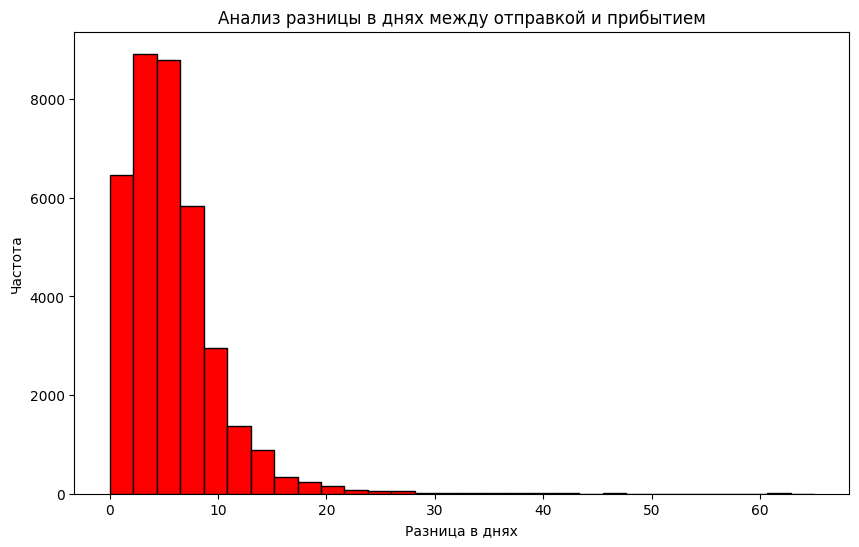

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(train_copy_enc['Разница в днях'], bins=30, color='red', edgecolor='black')
plt.title('Анализ разницы в днях между отправкой и прибытием')
plt.xlabel('Разница в днях')
plt.ylabel('Частота')
plt.show()

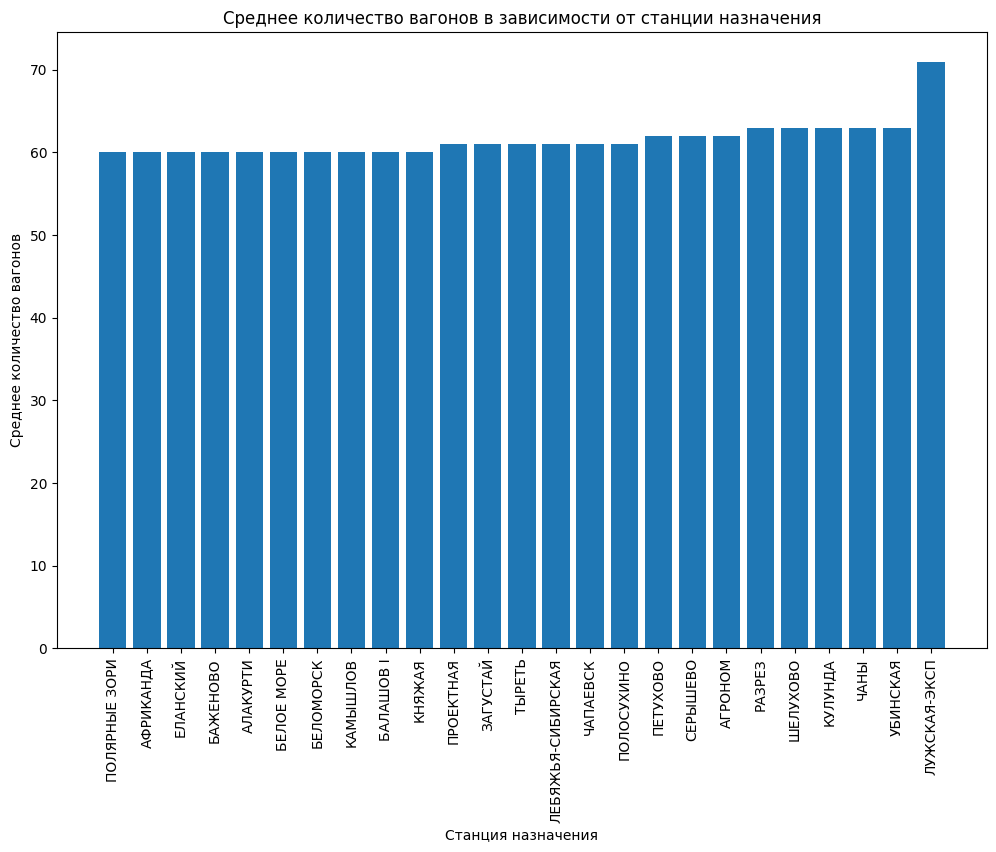

In [ ]:

avg_wagons_by_destination = train_copy.groupby('Станция назначения')['Количество вагонов'].mean().reset_index().sort_values(by = 'Количество вагонов').tail(25)

# Построение графика
plt.figure(figsize=(12, 8))
plt.bar(avg_wagons_by_destination['Станция назначения'], avg_wagons_by_destination['Количество вагонов'])
plt.xlabel('Станция назначения')
plt.ylabel('Среднее количество вагонов')
plt.title('Среднее количество вагонов в зависимости от станции назначения')
plt.xticks(rotation=90)
plt.show()

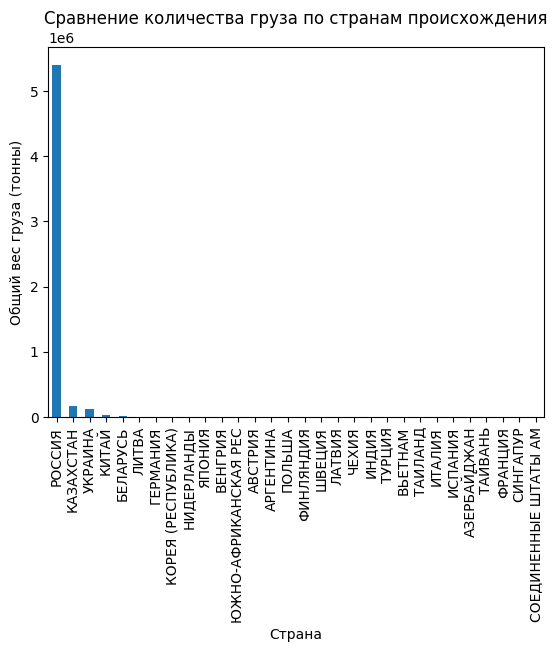

In [18]:
cargo_by_country = train_copy.groupby('Страна отправления')['Вес груза, тонн'].sum().sort_values(ascending=False)

cargo_by_country.plot(kind='bar')
plt.title('Сравнение количества груза по странам происхождения')
plt.xlabel('Страна')
plt.ylabel('Общий вес груза (тонны)')
plt.show()

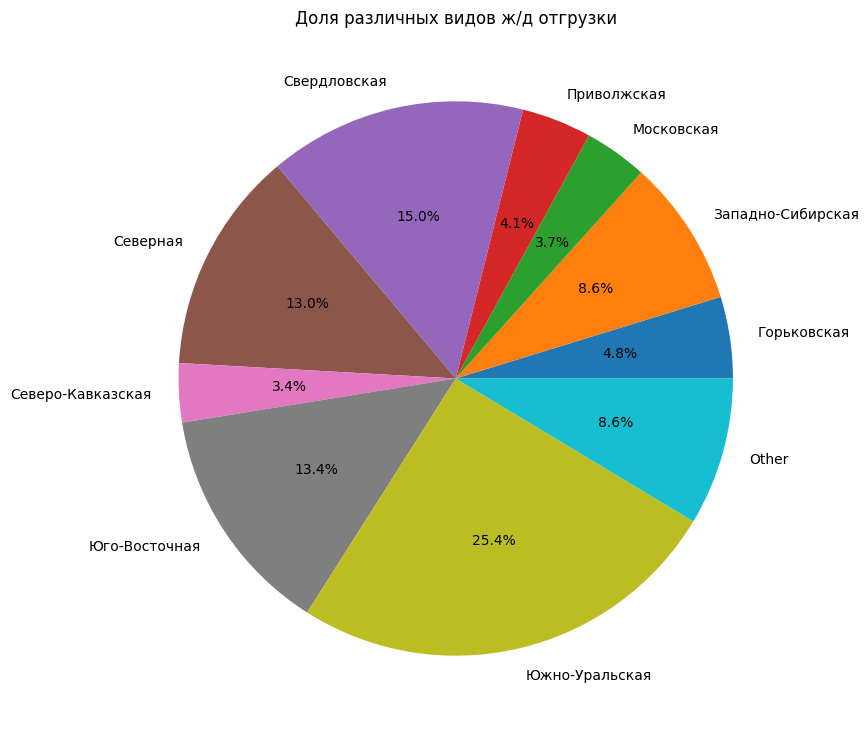

In [19]:

railway_shipments_count = train_copy.groupby(by = 'Ж/Д отгрузки' ).size().reset_index(name='col')

label = railway_shipments_count.index
sizes = railway_shipments_count.values

labels = {sizes[i][0]: sizes[i][1] for i in range(len(sizes))}

other = 0
ss = []
for name, val in labels.items():
    if val/sum(labels.values())*100 <= 3:
        other += val
        ss.append(name)
for i in ss:
    del labels[i]
labels['Other']  = other
# Отображение круговой диаграммы
# Теперь создадим круговую диаграмму
plt.figure(figsize=(9, 9))
plt.pie(list(labels.values()), labels=list(labels.keys()), autopct='%1.1f%%')
plt.title('Доля различных видов ж/д отгрузки')
plt.show()

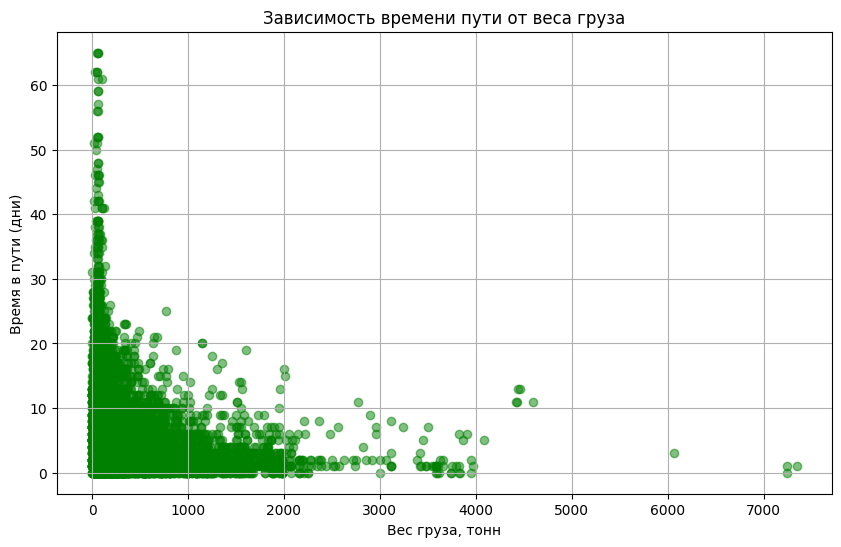

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(train_copy_enc['Вес груза, тонн'], train_copy_enc['Разница в днях'], alpha=0.5, c='green')
plt.title('Зависимость времени пути от веса груза')
plt.xlabel('Вес груза, тонн')
plt.ylabel('Время в пути (дни)')
plt.grid(True)
plt.show()

In [ ]:
label_endcoder = LabelEncoder()


for i in train_copy_enc.columns:

    if i not in  ['Разница в днях','Тонно-километры','Вес груза, тонн']:
        train_copy_enc[i] = label_endcoder.fit_transform(train_copy_enc[i])
train_copy_enc

,Станция отправления,Регион отгрузки,Ж/Д отгрузки,Станция назначения,Регион поставки,Ж/Д поставки,Клиент,ОКПО отправителя,Наименование груза,"Вес груза, тонн",Количество вагонов,Тонно-километры,Характер перевозок,Станция отправления загран,Станция назначения загран,Отч мес,Отч год,Страна отправления,Страна назначения,Разница в днях
0,365,18,5,496,1,5,166,144,11,67.460,1,45536,3,75,62,0,0,17,22,1
1,365,18,5,496,1,5,166,144,11,67.680,1,45684,3,75,62,0,0,17,22,2
2,365,18,5,496,1,5,166,144,11,265.350,4,179112,3,75,62,0,0,17,22,1
3,365,18,5,496,1,5,166,144,11,66.688,1,45014,3,75,5,0,0,17,20,2
4,365,18,5,496,1,5,166,144,11,67.520,1,45576,3,75,5,0,0,17,20,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36188,345,40,0,23,14,0,432,376,16,529.997,59,102306,0,0,0,0,0,17,35,1
36189,345,40,0,638,41,0,432,376,16,187.974,59,0,0,0,0,0,0,17,35,0
36190,172,65,4,896,70,4,426,46,16,30.600,18,2718,0,0,0,0,0,17,35,2
36191,180,39,8,327,40,8,12,381,16,208.010,62,0,0,0,0,0,0,17,35,2


In [ ]:
X = train_copy_enc.drop('Разница в днях',axis = 1)
y = train_copy_enc['Разница в днях']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=70)

In [ ]:
train_copy_enc

,Станция отправления,Регион отгрузки,Ж/Д отгрузки,Станция назначения,Регион поставки,Ж/Д поставки,Клиент,ОКПО отправителя,Наименование груза,"Вес груза, тонн",Количество вагонов,Тонно-километры,Характер перевозок,Станция отправления загран,Станция назначения загран,Отч мес,Отч год,Страна отправления,Страна назначения,Разница в днях
0,365,18,5,496,1,5,166,144,11,67.460,1,45536,3,75,62,0,0,17,22,1
1,365,18,5,496,1,5,166,144,11,67.680,1,45684,3,75,62,0,0,17,22,2
2,365,18,5,496,1,5,166,144,11,265.350,4,179112,3,75,62,0,0,17,22,1
3,365,18,5,496,1,5,166,144,11,66.688,1,45014,3,75,5,0,0,17,20,2
4,365,18,5,496,1,5,166,144,11,67.520,1,45576,3,75,5,0,0,17,20,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36188,345,40,0,23,14,0,432,376,16,529.997,59,102306,0,0,0,0,0,17,35,1
36189,345,40,0,638,41,0,432,376,16,187.974,59,0,0,0,0,0,0,17,35,0
36190,172,65,4,896,70,4,426,46,16,30.600,18,2718,0,0,0,0,0,17,35,2
36191,180,39,8,327,40,8,12,381,16,208.010,62,0,0,0,0,0,0,17,35,2


In [ ]:
models = [
    ('Lasso Regression', Lasso()),
    ('Random Forest', RandomForestRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Ridge Regression', Ridge())




]

predictions = []

for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions.append((model_name, y_pred))


for model_name, y_pred in predictions:
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'Model: {model_name}')
    print(' R^2:', r2)
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'mean_absolute_error: {mae:.2f}')
    print(f'rmse: {rmse:.2f}')

    print('--------------------------')

Model: Lasso Regression
 R^2: 0.1459629538229814
Mean Squared Error: 14.96
mean_absolute_error: 2.58
rmse: 3.87
--------------------------
Model: Random Forest
 R^2: 0.6438415353867198
Mean Squared Error: 6.24
mean_absolute_error: 1.47
rmse: 2.50
--------------------------
Model: Linear Regression
 R^2: 0.1575483191125483
Mean Squared Error: 14.76
mean_absolute_error: 2.56
rmse: 3.84
--------------------------
Model: Decision Tree
 R^2: 0.38223399322309803
Mean Squared Error: 10.82
mean_absolute_error: 1.88
rmse: 3.29
--------------------------
Model: Ridge Regression
 R^2: 0.1575484285171571
Mean Squared Error: 14.76
mean_absolute_error: 2.56
rmse: 3.84
--------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.10996e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2)
tpot.fit(X_train, y_train)

# Оценка модели
print(tpot.score(X_test, y_test))

# Экспорт обученной модели
tpot.export('tpot_regressor_pipeline.py')

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -6.0502362618868695

Generation 2 - Current best internal CV score: -6.0502362618868695

Generation 3 - Current best internal CV score: -5.812990522123135

Generation 4 - Current best internal CV score: -5.812990522123135

Generation 5 - Current best internal CV score: -5.6195957231661025

Best pipeline: ExtraTreesRegressor(RidgeCV(input_matrix), bootstrap=False, max_features=0.6500000000000001, min_samples_leaf=1, min_samples_split=14, n_estimators=100)
-5.587606243876904


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


In [ ]:
from xgboost import XGBRegressor
trot_ml= XGBRegressor( learning_rate=0.1, max_depth=9, min_child_weight=19, n_estimators=100, n_jobs=1, subsample=0.9500000000000001, verbosity=0)
trot_ml.fit(X_train, y_train)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

# Вывод результатов
mae = mean_absolute_error(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae}")
print(' MSE:', mse_best)
print('R^2:', r2_best)
print('RMSE:', np.sqrt(mse_best))

Mean Absolute Error (MAE): 1.3693098608785803
 MSE: 5.341074398893596
R^2: 0.69507118586611
RMSE: 2.31107645890256


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import make_scorer



# Создайте модель градиентного бустинга
model = GradientBoostingRegressor(n_estimators=50, random_state=42)  # Можете настраивать количество деревьев и другие параметры
parameters = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]}

# Обучение модели с использованием GridSearchCV
grid_search = GridSearchCV(model, parameters, scoring={'MAE': make_scorer(mean_absolute_error), 'R^2': make_scorer(r2_score)}, refit='R^2', cv=3)
grid_search.fit(X_train, y_train)

# Получение результатов
best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_

# Оценка на тестовых данных
y_pred_best = best_estimator.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

# Вывод результатов
mae = mean_absolute_error(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae}")
print('Best Parameters:', best_params)
print('Best MSE:', mse_best)
print('Best R^2:', r2_best)
print('Best RMSE:', np.sqrt(mse_best))

Mean Absolute Error (MAE): 1.3693098608785803
Best Parameters: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 200}
Best MSE: 5.820758638600121
Best R^2: 0.6676853950217199
Best RMSE: 2.4126248441479916


In [ ]:
from catboost import CatBoostRegressor
my_model = CatBoostRegressor(loss_function='RMSE', iterations=1500, learning_rate=0.14, depth=5)

my_model.fit(X_train, y_train, verbose=100)
y_pred = my_model.predict(X_test)


# calculate mean squared error on val sub-set preds
y_pred_best = my_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_best)
r2 = r2_score(y_test, y_pred_best)

# Вывод результатов
mae = mean_absolute_error(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae}")

print(' MSE:', mse)
print(' R^2:', r2)
print('RMSE:', np.sqrt(mse))

0:	learn: 3.9732185	total: 3.98ms	remaining: 5.97s
100:	learn: 2.4198329	total: 276ms	remaining: 3.82s
200:	learn: 2.2529957	total: 543ms	remaining: 3.51s
300:	learn: 2.1569242	total: 803ms	remaining: 3.2s
400:	learn: 2.0890430	total: 1.04s	remaining: 2.87s
500:	learn: 2.0383660	total: 1.29s	remaining: 2.57s
600:	learn: 1.9934802	total: 1.53s	remaining: 2.29s
700:	learn: 1.9540339	total: 1.78s	remaining: 2.02s
800:	learn: 1.9199199	total: 2.02s	remaining: 1.76s
900:	learn: 1.8887475	total: 2.27s	remaining: 1.51s
1000:	learn: 1.8614774	total: 2.51s	remaining: 1.25s
1100:	learn: 1.8352972	total: 2.76s	remaining: 1s
1200:	learn: 1.8128783	total: 3s	remaining: 747ms
1300:	learn: 1.7924071	total: 3.24s	remaining: 496ms
1400:	learn: 1.7733460	total: 3.48s	remaining: 246ms
1499:	learn: 1.7554902	total: 3.73s	remaining: 0us
Mean Absolute Error (MAE): 1.3577423034992526
 MSE: 5.326412951308055
 R^2: 0.6959082267855683
RMSE: 2.3079022837434118


In [ ]:
import shap
explainer_your_model = shap.Explainer(my_model)
shap_values_your_model = explainer_your_model.shap_values(X_test)

# SHAP для TPOT модели
explainer_tpot = shap.Explainer(trot_ml)
shap_values_tpot = explainer_tpot.shap_values(X_test)

[15:46:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


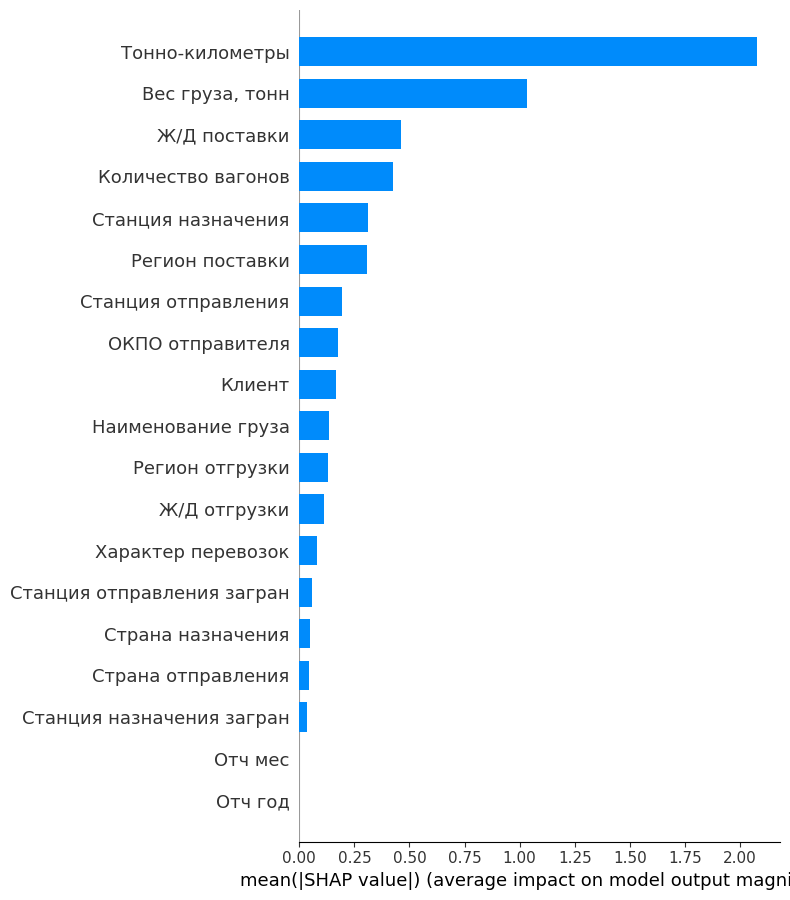

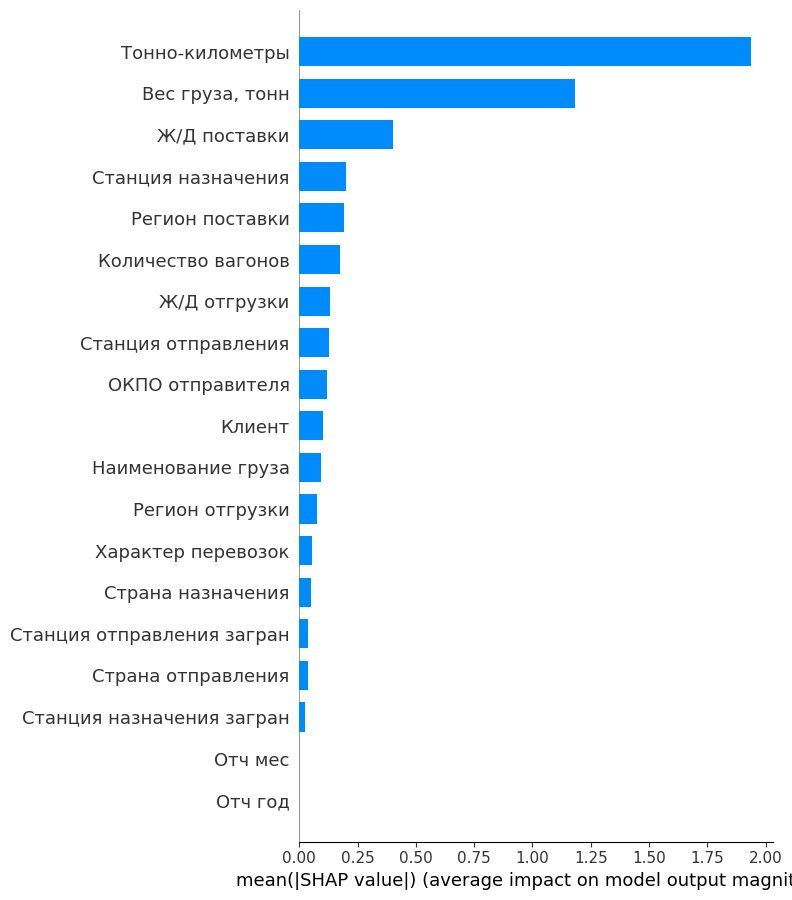

In [ ]:
# График для нашей модели
shap.summary_plot(shap_values_your_model, X_test, plot_type="bar")

# График для TPOT модели
shap.summary_plot(shap_values_tpot, X_test, plot_type="bar")

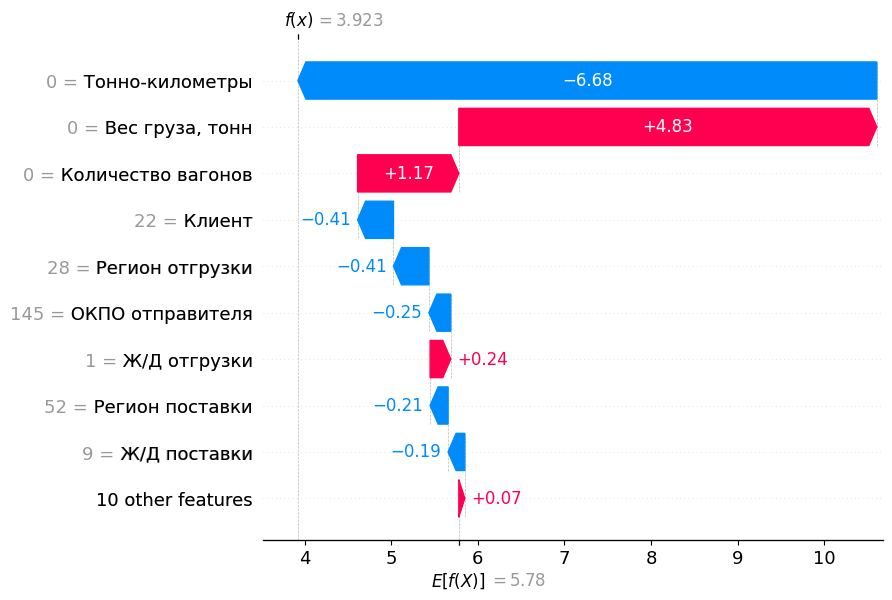

In [ ]:
min_height_index = train_copy_enc['Вес груза, тонн'].idxmin()

explainer = shap.Explainer(my_model)
shap_values = explainer(X)

# диаграмма “водопад” для наблюдения с самым маленьким весом
shap.plots.waterfall(shap_values[min_height_index])


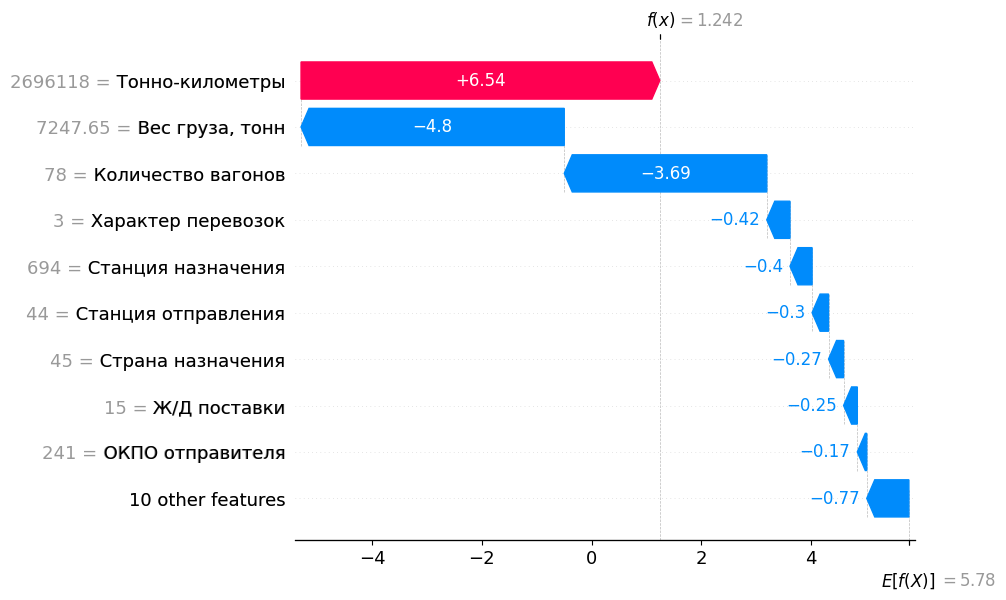

In [ ]:
max_height_index = train_copy_enc['Вес груза, тонн'].idxmax()

explainer = shap.Explainer(my_model)
shap_values = explainer(X)

# диаграмма “водопад” для наблюдения с самым большим весом
shap.plots.waterfall(shap_values[max_height_index])